In [3]:
## Import needed tools
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split, cross_val_score
%matplotlib inline  


## Predicting salaries using Logistic Regression

#### Load in the the data of scraped salaries

In [4]:
data = pd.read_csv('/Users/cguy/kelstuff/ga_summer_2016/indeed.csv')            
data.drop(['Unnamed: 0'], axis=1, inplace=True)

data.head()

,Company,Job,Location,Salary,Sponsored,Sal_Stat,job_type
0,Department Of The Interior,"Statistician, GS-1530-12 (DEU-PERM-DS)","Lakewood, CO",87792,False,0,other
1,Mental Health Center of Denver,Financial Data Scientist,"Denver, CO",75000,False,0,sct_type
2,Denver Public Schools,SENIOR RESEARCH ANALYST,"Denver, CO",68983,False,0,other
3,Workbridge Associates,Mid-Level Data Scientist,"Chicago, IL",105000,False,0,sct_type
4,Workbridge Associates,Data Scientist,"Chicago, IL",95000,False,0,sct_type


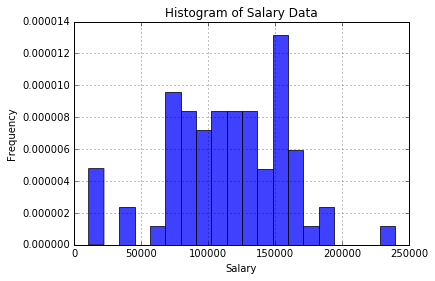

In [8]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


# the histogram of the data
plt.hist(data['Salary'], 20, normed=1, facecolor='blue', alpha=0.75)

plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Histogram of Salary Data')
plt.grid(True)

plt.show()



In [9]:
print data.describe()
print 'Median: ' + str(np.median(data['Salary']))

              Salary   Sal_Stat
count      73.000000  73.000000
mean   113770.520548   0.506849
std     44183.925488   0.503413
min     10833.000000   0.000000
25%     87792.000000   0.000000
50%    120000.000000   1.000000
75%    150000.000000   1.000000
max    240000.000000   1.000000
Median: 120000.0


In [10]:
#Creating dummy variables with method that includes adding intercept step....

import patsy

X = patsy.dmatrix('C(Location) + C(job_type)', data)
y = data['Sal_Stat'].values

In [11]:
X.design_info.column_names

pdf = pd.DataFrame(X, columns=X.design_info.column_names)
pdf['Target'] = y
pdf

,Intercept,"C(Location)[T.Austin, TX]","C(Location)[T.Bloomingdale, IL]","C(Location)[T.Boston, MA]","C(Location)[T.Cambridge, MA]","C(Location)[T.Campbell, CA]","C(Location)[T.Chicago, IL]","C(Location)[T.Deerfield, IL]","C(Location)[T.Denver, CO]","C(Location)[T.Fort Collins, CO]",...,"C(Location)[T.San Jose, CA]","C(Location)[T.Santa Clara, CA]","C(Location)[T.Seattle, WA]","C(Location)[T.Sunnyvale, CA]","C(Location)[T.Waltham, MA]","C(Location)[T.Yaphank, NY]",C(job_type)[T.other],C(job_type)[T.sct_type],C(job_type)[T.sr_type],Target
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
6,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
8,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [12]:
# Train-Test-Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=77)


In [13]:
# declaring logistic regression model, then fitting model to data, then predicting probabilities of target var
# this logistic regression model is using all features

lr = LogisticRegression(solver='liblinear')
lr_model = lr.fit(X_train, y_train)
lr_ypred = lr_model.predict(X_test)

# setting up and printing confusion matrix for model
lr_cm = confusion_matrix(y_test, lr_ypred, labels=lr.classes_)
lr_cm = pd.DataFrame(lr_cm, columns=['predicted_high_salary','predicted_low_salary'], index=['high_salary', 'low_salary'])
lr_cm

,predicted_high_salary,predicted_low_salary
high_salary,8,6
low_salary,2,9


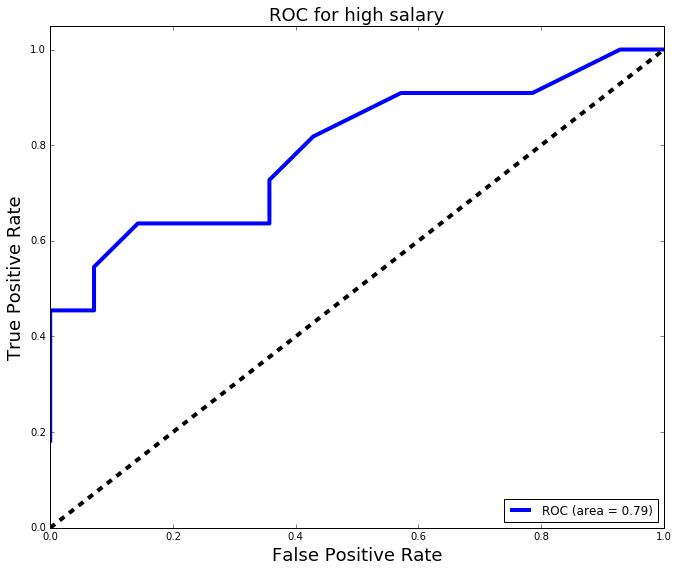

In [14]:
#Looking at ROC curve and AUC for first logistic regression model

from sklearn.metrics import roc_curve, auc

def auc_plotting_function(rate1, rate2, rate1_name, rate2_name, curve_name):
    AUC = auc(rate1, rate2)
    # Plot of a ROC curve for class 1 (high_salary)
    plt.figure(figsize=[11,9])
    plt.plot(rate1, rate2, label=curve_name + ' (area = %0.2f)' % AUC, linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(rate1_name, fontsize=18)
    plt.ylabel(rate2_name, fontsize=18)
    plt.title(curve_name + ' for high salary', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

def plot_roc(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_plotting_function(fpr, tpr, 'False Positive Rate', 'True Positive Rate', 'ROC')

Y_score = lr.decision_function(X_test)
plot_roc(y_test, Y_score)

In [16]:
# Printing out classification report (which calculates several types of predictive scores on a classification model).

print(classification_report(y_test, lr_ypred, labels=lr.classes_))

             precision    recall  f1-score   support

          0       0.80      0.57      0.67        14
          1       0.60      0.82      0.69        11

avg / total       0.71      0.68      0.68        25



In [17]:
cross_val_score(lr, X, y, cv=3).mean()

0.61611111111111116

In [18]:
# Now building a log reg model with a L1 Lasso penalty (regularization)

lr_l1 = LogisticRegression(C=1.5, penalty='l1', solver='liblinear')
lr_l1_model = lr_l1.fit(X_train, y_train)
lr_l1_ypred = lr_l1_model.predict(X_test)
lr_l1_cm = confusion_matrix(y_test, lr_l1_ypred, labels=lr_l1.classes_)
lr_l1_cm = pd.DataFrame(lr_l1_cm, columns=['predicted_high_salary','predicted_low_salary'], index=['high_salary', 'low_salary'])
lr_l1_cm

,predicted_high_salary,predicted_low_salary
high_salary,5,9
low_salary,1,10


In [19]:
print(classification_report(y_test, lr_l1_ypred, labels=lr_l1.classes_))

             precision    recall  f1-score   support

          0       0.83      0.36      0.50        14
          1       0.53      0.91      0.67        11

avg / total       0.70      0.60      0.57        25



In [20]:
cross_val_score(lr_l1, X, y, cv=3).mean()

0.60222222222222221

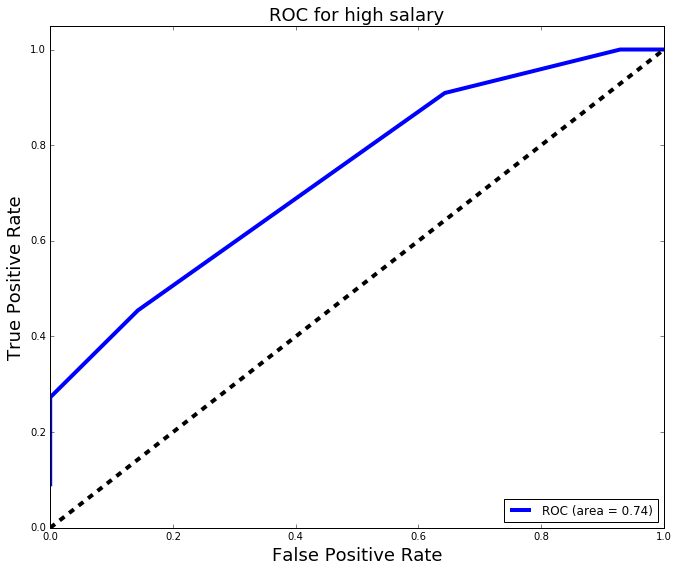

In [21]:
from sklearn.metrics import roc_curve, auc

def auc_plotting_function(rate1, rate2, rate1_name, rate2_name, curve_name):
    AUC = auc(rate1, rate2)
    # Plot of a ROC curve for class 1 (has_cancer)
    plt.figure(figsize=[11,9])
    plt.plot(rate1, rate2, label=curve_name + ' (area = %0.2f)' % AUC, linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(rate1_name, fontsize=18)
    plt.ylabel(rate2_name, fontsize=18)
    plt.title(curve_name + ' for high salary', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

def plot_roc(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_plotting_function(fpr, tpr, 'False Positive Rate', 'True Positive Rate', 'ROC')

Y_score = lr_l1.decision_function(X_test)
plot_roc(y_test, Y_score)

In [22]:
# Now, building a logistic regression model for target variable using only job title features...

X_j = patsy.dmatrix('C(job_type)', data)
y_j = data['Sal_Stat'].values

X_j.design_info.column_names

pdf_j = pd.DataFrame(X_j, columns=X_j.design_info.column_names)
pdf_j['Target'] = y_j
pdf_j

,Intercept,C(job_type)[T.other],C(job_type)[T.sct_type],C(job_type)[T.sr_type],Target
0,1.0,1.0,0.0,0.0,0
1,1.0,0.0,1.0,0.0,0
2,1.0,1.0,0.0,0.0,0
3,1.0,0.0,1.0,0.0,0
4,1.0,0.0,1.0,0.0,0
5,1.0,0.0,1.0,0.0,1
6,1.0,0.0,0.0,1.0,0
7,1.0,1.0,0.0,0.0,1
8,1.0,0.0,0.0,1.0,1
9,1.0,0.0,1.0,0.0,1


In [24]:
X_train_j, X_test_j, y_train_j, y_test_j = train_test_split(X_j, y_j, test_size=0.33, random_state=77)

# declaring logistic regression model, then fitting model to data, then predicting probabilities of target var
# this logistic regression model is using all features

lr = LogisticRegression(solver='liblinear')
lr_model_j = lr.fit(X_train_j, y_train_j)
lr_ypred_j = lr_model_j.predict(X_test_j)

# setting up and printing confusion matrix for model
lr_cm_j = confusion_matrix(y_test_j, lr_ypred_j, labels=lr.classes_)
lr_cm_j = pd.DataFrame(lr_cm_j, columns=['predicted_high_salary','predicted_low_salary'], index=['high_salary', 'low_salary'])
lr_cm_j

,predicted_high_salary,predicted_low_salary
high_salary,4,10
low_salary,0,11


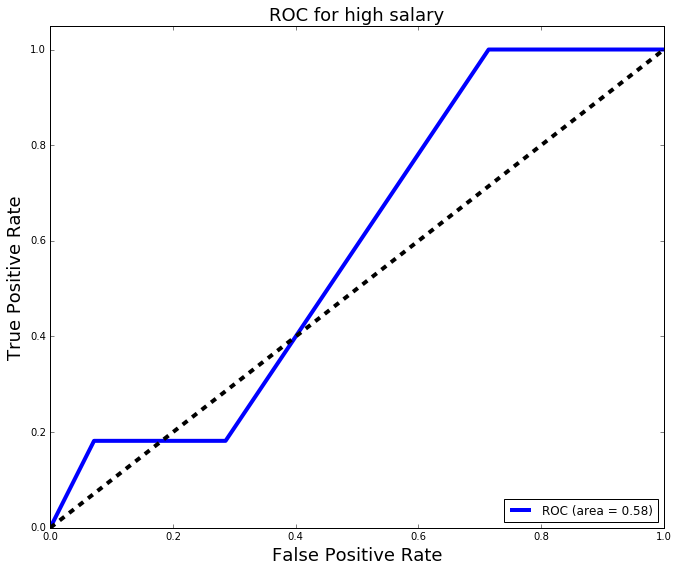

             precision    recall  f1-score   support

          0       1.00      0.29      0.44        14
          1       0.52      1.00      0.69        11

avg / total       0.79      0.60      0.55        25



0.60222222222222221

In [25]:
#Looking at ROC curve and AUC for first logistic regression model

from sklearn.metrics import roc_curve, auc

def auc_plotting_function(rate1, rate2, rate1_name, rate2_name, curve_name):
    AUC = auc(rate1, rate2)
    # Plot of a ROC curve for class 1 (high_salary)
    plt.figure(figsize=[11,9])
    plt.plot(rate1, rate2, label=curve_name + ' (area = %0.2f)' % AUC, linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(rate1_name, fontsize=18)
    plt.ylabel(rate2_name, fontsize=18)
    plt.title(curve_name + ' for high salary', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

def plot_roc(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_plotting_function(fpr, tpr, 'False Positive Rate', 'True Positive Rate', 'ROC')

Y_score_j = lr.decision_function(X_test_j)
plot_roc(y_test_j, Y_score_j)

print(classification_report(y_test_j, lr_ypred_j, labels=lr.classes_))

cross_val_score(lr, X_j, y_j, cv=3).mean()